Load a random vector with the divide-and-conquer state preparation.

In [1]:
import numpy as np
from encoding import Encoding
from qiskit import Aer, ClassicalRegister, execute, visualization

In [2]:
input_vector = 2*np.random.rand(16)-1
input_vector = input_vector / np.linalg.norm(input_vector)
expected_probabilities = input_vector ** 2

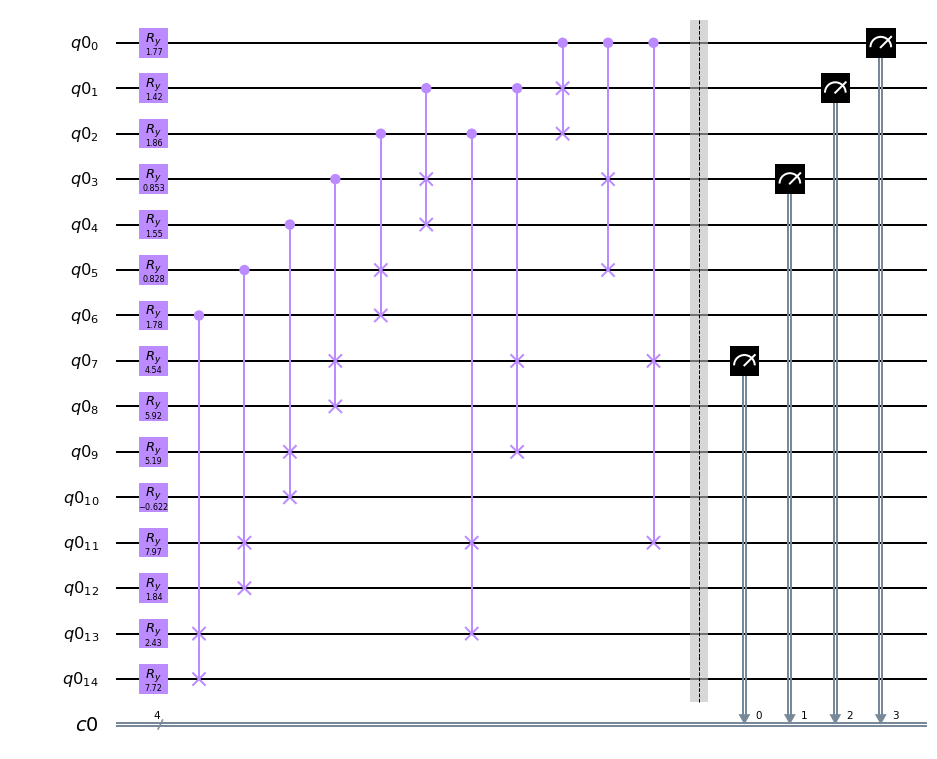

In [3]:
encode = Encoding(input_vector, 'dc_amplitude_encoding')
output = ClassicalRegister(len(encode.output_qubits))
encode.qcircuit.add_register(output)
encode.qcircuit.barrier()

for k, value in enumerate(reversed(encode.output_qubits)):
    encode.qcircuit.measure(encode.quantum_data[value], output[k])
    
encode.qcircuit.draw('mpl')

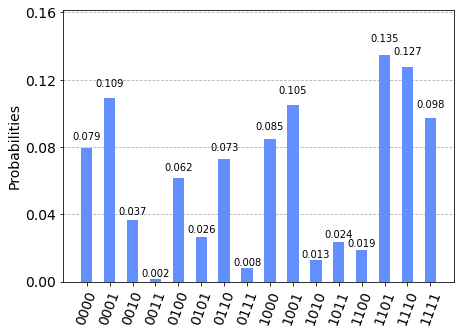

In [4]:
circuit = encode.qcircuit
backend_sim = Aer.get_backend('qasm_simulator')
shots = 10000
job = execute(circuit, backend_sim, shots = shots)
results = job.result()
counts = results.get_counts()
visualization.plot_histogram(counts)

In [5]:
expected_probabilities

array([0.07868718, 0.11186685, 0.03808094, 0.0012488 , 0.0638148 ,
       0.02388018, 0.07580074, 0.00783114, 0.07965269, 0.1000396 ,
       0.01273044, 0.02192747, 0.01842706, 0.1330799 , 0.13244741,
       0.10048482])